In [2]:
import pandas as pd
import os
import numpy as np
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("D:/Sukrutha_Datasets/housing.csv")

In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
df.dropna(inplace = True, axis = 0)

In [7]:
numerical_features = ["longitude","latitude","housing_median_age", "total_rooms", "total_bedrooms", "population", "households","median_income","median_house_value"]
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-1.327314,1.051717,0.982163,-0.803813,-0.970325,-0.973320,-0.976833,2.345163,2.128819,NEAR BAY
1,-1.322323,1.042355,-0.606210,2.042130,1.348276,0.861339,1.670373,2.332632,1.313626,NEAR BAY
2,-1.332305,1.037674,1.855769,-0.535189,-0.825561,-0.819769,-0.843427,1.782939,1.258183,NEAR BAY
3,-1.337296,1.037674,1.855769,-0.623510,-0.718768,-0.765056,-0.733562,0.932970,1.164622,NEAR BAY
4,-1.337296,1.037674,1.855769,-0.461970,-0.611974,-0.758879,-0.628930,-0.013143,1.172418,NEAR BAY


One hot-encoding

In [8]:
ocean_proximity_encoded = pd.get_dummies(df["ocean_proximity"])
df=df.drop("ocean_proximity", axis=1)
df = pd.concat([df, ocean_proximity_encoded], axis=1)


In [9]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-1.327314,1.051717,0.982163,-0.803813,-0.970325,-0.973320,-0.976833,2.345163,2.128819,0,0,0,1,0
1,-1.322323,1.042355,-0.606210,2.042130,1.348276,0.861339,1.670373,2.332632,1.313626,0,0,0,1,0
2,-1.332305,1.037674,1.855769,-0.535189,-0.825561,-0.819769,-0.843427,1.782939,1.258183,0,0,0,1,0
3,-1.337296,1.037674,1.855769,-0.623510,-0.718768,-0.765056,-0.733562,0.932970,1.164622,0,0,0,1,0
4,-1.337296,1.037674,1.855769,-0.461970,-0.611974,-0.758879,-0.628930,-0.013143,1.172418,0,0,0,1,0


<AxesSubplot:>

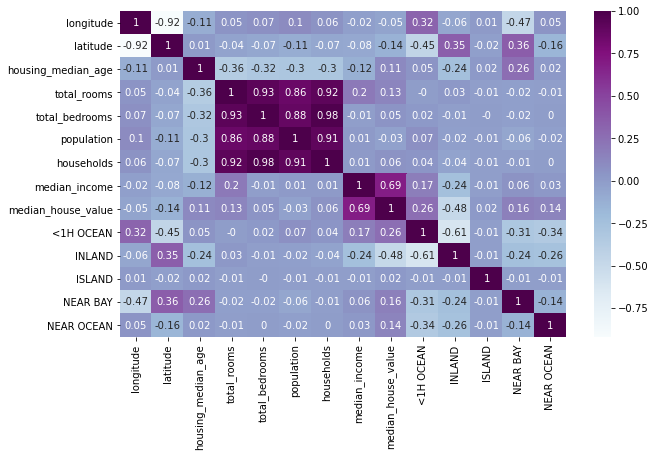

In [10]:
plt.figure(figsize = (10,6))
sns.heatmap(round(df.corr(),2), cmap = 'BuPu', annot = True)

C:\Users\Sukrutha\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


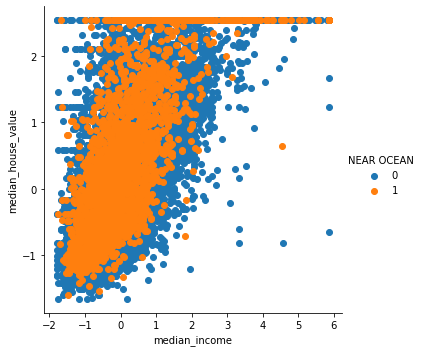

In [14]:
sns.FacetGrid(df,hue="NEAR OCEAN",size=5)\
.map(plt.scatter,'median_income','median_house_value')\
.add_legend()

In [17]:
X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
lr = LinearRegression()

In [20]:
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)


In [21]:
mse = mean_squared_error(y_test,y_pred)
print("Mean Squared Error: ", mse)

Mean Squared Error:  0.36039526073547834


Applying Ridge optimizer

In [75]:
ridge = Ridge(alpha=1.0) # alpha = 1.0 controls the strength of regularization 
ridge.fit(X_train,y_train)
y_pred = ridge.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
print("Mean Squared Error: ",mse)

Mean Squared Error:  0.3599458927634968


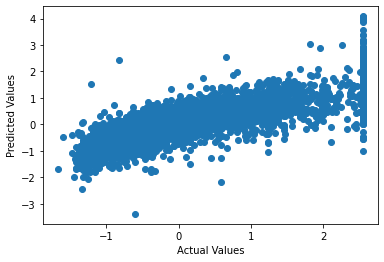

In [76]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

# Logistic Regression

In [93]:
#to implement logistic regression first we need to convert the regression problem into classification problem
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import SGDClassifier

In [77]:
#defining the threshold value for classification
threshold = df["median_house_value"].median()

In [78]:
#convert the target variable to binary
df["median_house_value"] = (df["median_house_value"] > threshold).astype(int)

In [84]:
X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [85]:
logreg = LogisticRegression()

In [86]:
#fit the model
logreg.fit(X_train_scaled,y_train)

LogisticRegression()

In [87]:
#make predictions on the dataset
y_pred = logreg.predict(X_test_scaled)

In [91]:
acc = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print("Accuracy: ",acc)
print("Confusion Matrix: ",cm)

Accuracy:  0.8426718864692929
Confusion Matrix:  [[1723  342]
 [ 301 1721]]


Logistic Regression with SGD optimizer

In [110]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature engineering
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Scale the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)
X_test_scaled = scaler.transform(X_test_poly)

In [100]:
# Hyperparameter tuning
param_grid = {
    "alpha": [0.001, 0.01, 0.1, 1],
    "penalty": ["l1", "l2"],
    "max_iter": [1000, 2000, 3000]
}
logreg_sgd = SGDClassifier(loss="log_loss", tol=1e-3, random_state=42)
grid_search = GridSearchCV(logreg_sgd, param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train_scaled, y_train)
print("Best parameters: ", grid_search.best_params_)

Best parameters:  {'alpha': 0.001, 'max_iter': 1000, 'penalty': 'l2'}


In [102]:
# Fit the model on the training data using best parameters
logreg_sgd = SGDClassifier(loss="log_loss", **grid_search.best_params_, random_state=42)
logreg_sgd.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = logreg_sgd.predict(X_test_scaled)

In [104]:
acc = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print("Accuracy: ",acc)
print("Confusion Matrix: ",cm)

Accuracy:  0.8522143381453389
Confusion Matrix:  [[1742  323]
 [ 281 1741]]


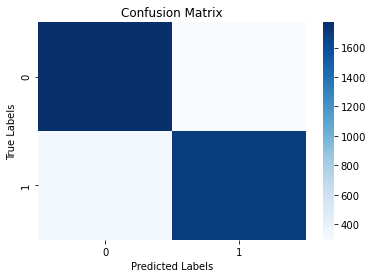

In [112]:
sns.heatmap(cm,cmap = "Blues",fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

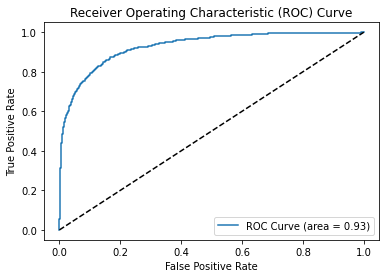

In [113]:
y_prob = logreg_sgd.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)
plt.plot(fpr, tpr, label="ROC Curve (area = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()